In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cài đặt tslearn
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.1 MB/s 


In [ ]:
#Thêm các thư viện cần thiết
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans

In [15]:
#Đọc file data
df = pd.read_csv('/content/drive/My Drive/Data/Final/stock.csv', index_col = 0)
df

,AAA,AAM,ABT,ACC,ACL,ADS,AGG,AGM,AGR,AMD,...,EIB,ELC,EMC,EVE,FCM,FCN,FDC,FIR,FIT,FLC
2020-03-25,10.60,11.20,33.30,19.00,17.30,10.45,27.20,10.00,2.70,3.64,...,16.00,4.60,12.00,8.30,6.00,7.21,8.53,29.70,5.55,3.28
2020-03-26,10.35,10.65,32.00,19.25,17.50,10.95,27.20,10.00,2.52,3.39,...,15.40,4.45,12.00,8.10,6.00,7.00,8.53,29.90,5.55,3.06
2020-03-27,10.20,11.20,32.00,19.25,17.60,10.35,26.85,10.00,2.51,3.16,...,15.70,4.49,12.00,7.63,5.90,7.00,9.00,29.75,5.35,2.85
2020-03-30,9.70,11.30,33.35,17.95,17.75,9.63,26.35,10.00,2.34,2.94,...,15.70,4.18,12.00,7.80,5.89,6.79,8.98,29.10,4.98,2.66
2020-03-31,9.39,11.50,31.30,18.90,17.50,10.10,26.30,10.00,2.20,2.74,...,14.65,4.16,12.00,7.75,5.48,6.79,8.98,28.70,4.88,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,12.75,12.20,42.00,14.95,25.80,28.90,38.35,28.85,13.15,3.56,...,32.50,19.00,23.95,15.25,6.47,17.40,25.50,42.40,9.82,6.20
2022-05-27,12.65,12.40,42.00,15.00,26.70,29.60,38.30,29.45,13.10,3.68,...,34.10,19.30,23.50,15.30,6.50,17.40,25.50,43.20,9.82,5.97
2022-05-30,12.75,12.35,40.20,15.00,26.70,29.95,39.90,31.00,13.30,3.93,...,34.00,19.50,22.85,15.45,6.72,17.60,25.50,42.50,9.85,6.38
2022-05-31,12.60,12.35,41.00,15.00,26.60,29.65,39.40,31.45,13.05,3.84,...,33.20,19.10,22.65,15.55,6.60,18.10,24.20,42.80,9.60,6.11


In [25]:
tssmv = TimeSeriesScalerMeanVariance(mu = 0., std = 1.)
data_sc = tssmv.fit_transform(df)
data = to_time_series_dataset(np.concatenate(data_sc, axis=1))
print(data.shape)
data

(100, 530, 1)


array([[[-0.576593  ],
        [-0.58496964],
        [-0.59489844],
        ...,
        [-0.94835159],
        [-0.95175547],
        [-0.95494386]],

       [[-0.53694917],
        [-0.56510672],
        [-0.527764  ],
        ...,
        [-0.9690205 ],
        [-0.96458838],
        [-0.9523838 ]],

       [[ 0.92326503],
        [ 0.84847115],
        [ 0.86863242],
        ...,
        [ 0.47005235],
        [ 0.50606331],
        [ 0.55549236]],

       ...,

       [[ 0.68540208],
        [ 0.7094307 ],
        [ 0.71757993],
        ...,
        [ 0.58889858],
        [ 0.59846028],
        [ 0.60669359]],

       [[-0.91026185],
        [-0.90277638],
        [-0.92050049],
        ...,
        [-1.09820118],
        [-1.10575041],
        [-1.12390791]],

       [[-1.06024766],
        [-1.06763862],
        [-1.0883366 ],
        ...,
        [-1.27750398],
        [-1.28489786],
        [-1.29492001]]])

In [34]:
symbol_list = df.columns
symbol = []
for i in symbol_list:
  symbol.append(str(i))

symbol

['AAA',
 'AAM',
 'ABT',
 'ACC',
 'ACL',
 'ADS',
 'AGG',
 'AGM',
 'AGR',
 'AMD',
 'ANV',
 'APC',
 'APG',
 'ASM',
 'ASP',
 'AST',
 'BBC',
 'BCE',
 'BCG',
 'BFC',
 'BHN',
 'BIC',
 'BID',
 'BMC',
 'BMI',
 'BMP',
 'BRC',
 'BSI',
 'BTP',
 'BTT',
 'BVH',
 'BWE',
 'C32',
 'C47',
 'CAV',
 'CCI',
 'CCL',
 'CDC',
 'CEE',
 'CHP',
 'CIG',
 'CII',
 'CKG',
 'CLC',
 'CLL',
 'CLW',
 'CMG',
 'CMV',
 'CMX',
 'CNG',
 'COM',
 'CRC',
 'CRE',
 'CSM',
 'CSV',
 'CTD',
 'CTF',
 'CTG',
 'CTI',
 'CTS',
 'CVT',
 'D2D',
 'DAG',
 'DAH',
 'DAT',
 'DBC',
 'DBD',
 'DCL',
 'DCM',
 'DHA',
 'DHC',
 'DHG',
 'DHM',
 'DIG',
 'DLG',
 'DMC',
 'DPG',
 'DPM',
 'DPR',
 'DQC',
 'DRC',
 'DRH',
 'DRL',
 'DSN',
 'DTA',
 'DTL',
 'DTT',
 'DVP',
 'DXG',
 'DXV',
 'EIB',
 'ELC',
 'EMC',
 'EVE',
 'FCM',
 'FCN',
 'FDC',
 'FIR',
 'FIT',
 'FLC']

#**Standard Euclidean k-means**

Time:  0.7796363830566406


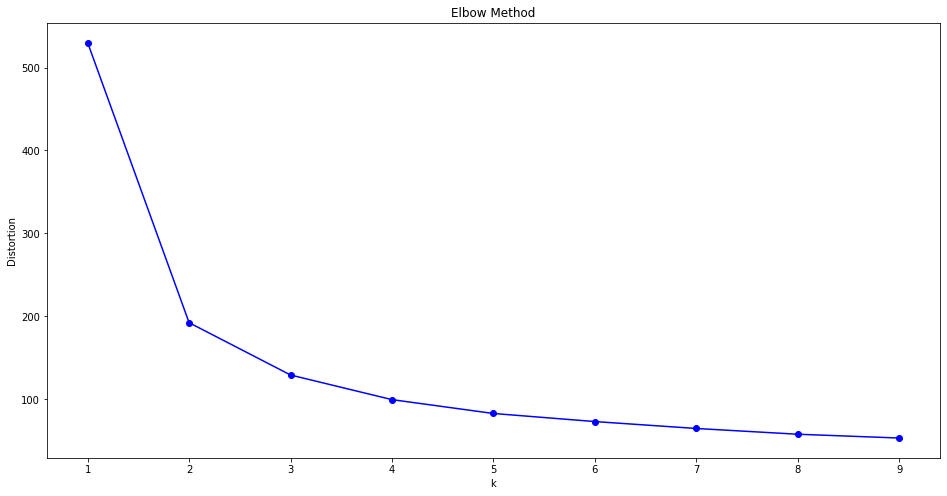

In [27]:
#Sử dụng phương pháp elbow để xác định k nhóm phân cụm phù hợp

start = time.time()

distortions = []
euclidean_model = []
for k in range(1,10):
  euclidean_model.append(TimeSeriesKMeans(n_clusters=k, random_state = 42))
  euclidean_model[k-1].fit(data)
  distortions.append(euclidean_model[k-1].inertia_)

print('Time: ', time.time() - start)

plt.figure(figsize=(16,8))
plt.plot(range(1, 10), distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

##**k = 2**

Standard Euclidean k-means


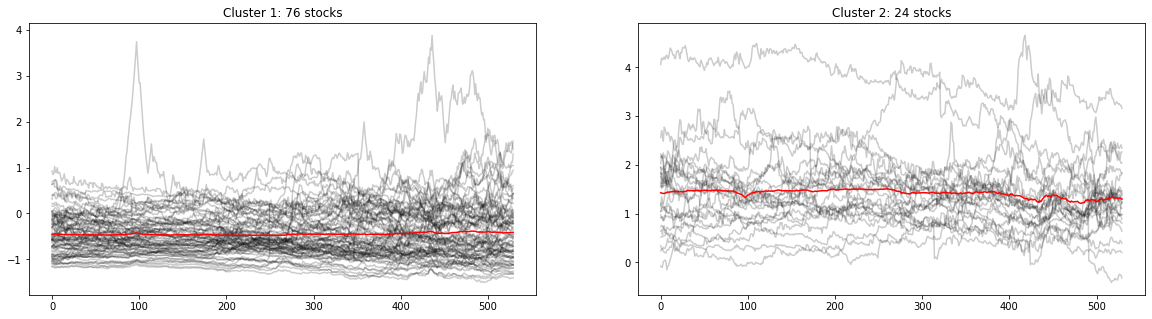

In [28]:
# Euclidean k-means
print('\033[1m'+'Standard Euclidean k-means')

y_pred_euclidean = euclidean_model[1].predict(data)

cluster_index = []

plt.figure(figsize=(20, 5))
for i in range(2):
  plt.subplot(1, 2, i + 1)

  cluster_index.append(np.where(y_pred_euclidean == i))
  count = 0
  for x in data[y_pred_euclidean == i]:
    count += 1
    plt.plot(x.ravel(), 'k-', alpha = 0.2)
  plt.plot(euclidean_model[1].cluster_centers_[i].ravel(), 'r-')
  plt.title('Cluster %d: %d stocks' % ((i + 1), count))

plt.show()

In [35]:
#Danh sách các stock theo nhóm phân cụm
cluster_euclidean = []
for arr in cluster_index:
  for i in arr:
    tmp = []
    for j in i:
      tmp.append(symbol[int(j)])
  cluster_euclidean.append(tmp)

for i, el in zip(range(2), cluster_euclidean):
  print(i+1, el)

1 ['AAA', 'AAM', 'ABT', 'ACC', 'ACL', 'ADS', 'AGM', 'AGR', 'AMD', 'ANV', 'APC', 'APG', 'ASM', 'ASP', 'BCE', 'BCG', 'BFC', 'BIC', 'BMC', 'BMI', 'BRC', 'BSI', 'BTP', 'BWE', 'C32', 'C47', 'CCI', 'CCL', 'CDC', 'CEE', 'CHP', 'CIG', 'CII', 'CKG', 'CLC', 'CLL', 'CLW', 'CMV', 'CMX', 'CNG', 'CRC', 'CRE', 'CSM', 'CSV', 'CTF', 'CTG', 'CTI', 'CTS', 'CVT', 'DAG', 'DAH', 'DAT', 'DCL', 'DCM', 'DHM', 'DIG', 'DLG', 'DPM', 'DQC', 'DRC', 'DRH', 'DTA', 'DTL', 'DTT', 'DXG', 'DXV', 'EIB', 'ELC', 'EMC', 'EVE', 'FCM', 'FCN', 'FDC', 'FIR', 'FIT', 'FLC']
2 ['AGG', 'AST', 'BBC', 'BHN', 'BID', 'BMP', 'BTT', 'BVH', 'CAV', 'CMG', 'COM', 'CTD', 'D2D', 'DBC', 'DBD', 'DHA', 'DHC', 'DHG', 'DMC', 'DPG', 'DPR', 'DRL', 'DSN', 'DVP']


#**DBA k-means**

Time:  1492.416310787201


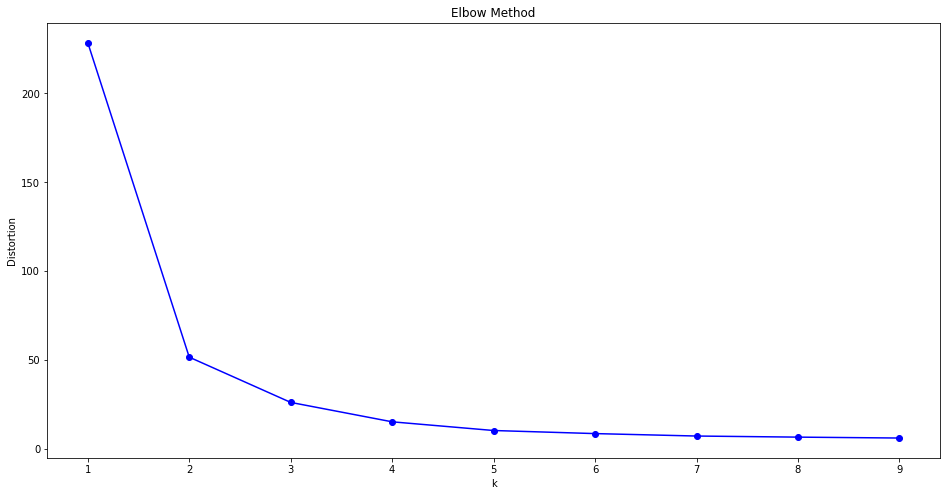

In [36]:
#Sử dụng phương pháp elbow để xác định k nhóm phân cụm phù hợp
distortions = []
dba_model = []

start = time.time()

for k in range(1,10):
  dba_model.append(TimeSeriesKMeans(n_clusters=k, metric='dtw', random_state = 42))
  dba_model[k-1].fit(data)
  distortions.append(dba_model[k-1].inertia_)

print('Time: ', time.time() - start)

plt.figure(figsize=(16,8))
plt.plot(range(1, 10), distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

##**k = 2**

DBA k-means


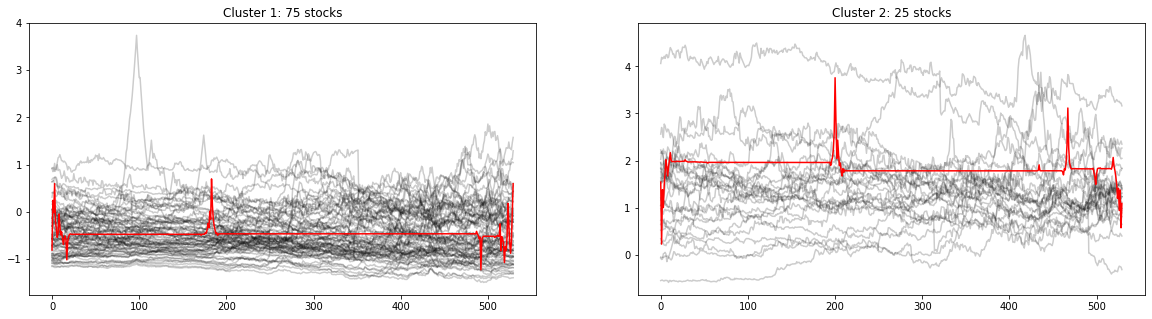

In [37]:
#DBA k-means
print('\033[1m'+'DBA k-means')

y_pred_dba = dba_model[1].predict(data)

cluster_index = []

plt.figure(figsize=(20, 5))
for i in range(2):
  plt.subplot(1, 2, i + 1)

  cluster_index.append(np.where(y_pred_dba == i))
  count = 0
  for x in data[y_pred_dba == i]:
    count +=1
    plt.plot(x.ravel(), 'k-', alpha = 0.2)
  plt.plot(dba_model[1].cluster_centers_[i].ravel(), 'r-')
  plt.title('Cluster %d: %d stocks' % ((i + 1), count))
  
plt.show()

In [38]:
#Danh sách các stock theo nhóm phân cụm
cluster_dba = []
for arr in cluster_index:
  for i in arr:
    tmp = []
    for j in i:
      tmp.append(symbol[int(j)])
  cluster_dba.append(tmp)

for i, el in zip(range(2), cluster_dba):
  print(i+1, el)

1 ['AAA', 'AAM', 'ABT', 'ACC', 'ACL', 'ADS', 'AGM', 'AGR', 'AMD', 'ANV', 'APC', 'APG', 'ASM', 'ASP', 'BCE', 'BCG', 'BFC', 'BIC', 'BID', 'BMC', 'BMI', 'BRC', 'BSI', 'BTP', 'BWE', 'C32', 'C47', 'CCI', 'CCL', 'CDC', 'CEE', 'CHP', 'CIG', 'CII', 'CKG', 'CLC', 'CLL', 'CLW', 'CMV', 'CMX', 'CNG', 'CRC', 'CRE', 'CSM', 'CTF', 'CTG', 'CTI', 'CTS', 'CVT', 'DAG', 'DAH', 'DAT', 'DCL', 'DCM', 'DHM', 'DLG', 'DPM', 'DQC', 'DRC', 'DRH', 'DTA', 'DTL', 'DTT', 'DXG', 'DXV', 'EIB', 'ELC', 'EMC', 'EVE', 'FCM', 'FCN', 'FDC', 'FIR', 'FIT', 'FLC']
2 ['AGG', 'AST', 'BBC', 'BHN', 'BMP', 'BTT', 'BVH', 'CAV', 'CMG', 'COM', 'CSV', 'CTD', 'D2D', 'DBC', 'DBD', 'DHA', 'DHC', 'DHG', 'DIG', 'DMC', 'DPG', 'DPR', 'DRL', 'DSN', 'DVP']


#**Soft-DTW k-means**

Time:  3126.5598282814026


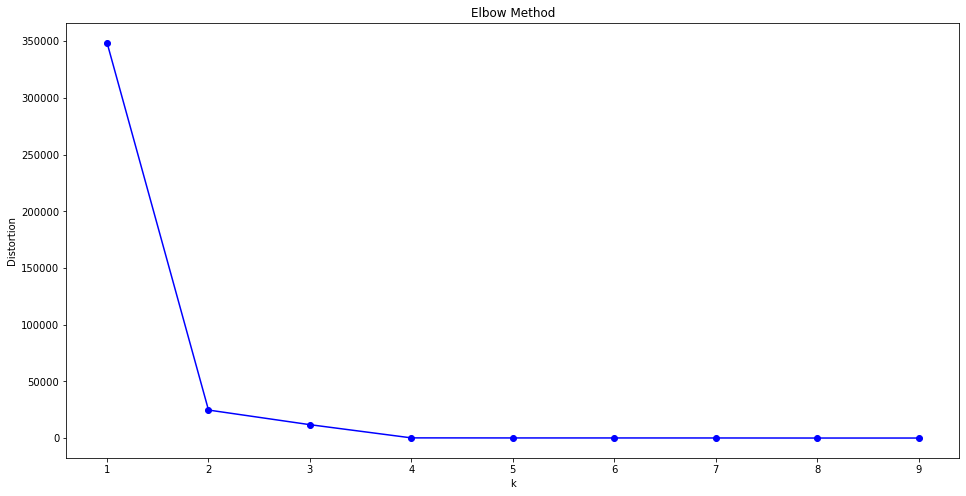

In [ ]:
#Sử dụng phương pháp elbow để xác định k nhóm phân cụm phù hợp
distortions = []
soft_dtw_model = []
start = time.time()
soft_dtw_model.append(TimeSeriesKMeans(n_clusters=1, metric='softdtw', metric_params={"gamma": .01}, max_iter = 10, random_state = 42))
soft_dtw_model[0].fit(data)
distortions.append(soft_dtw_model[0].inertia_)

for k in range(2,10):
  idx_new_center = np.random.choice(data.shape[0])
  barycenters_init = np.vstack((soft_dtw_model[-1].cluster_centers_, data[np.newaxis, idx_new_center]))
  soft_dtw_model.append(TimeSeriesKMeans(n_clusters=k, metric="softdtw", metric_params={"gamma": .01}, max_iter=10, init=barycenters_init))
  #soft_dtw_model.append(TimeSeriesKMeans(n_clusters=k, metric='softdtw', random_state = 42))
  soft_dtw_model[k-1].fit(data)
  #print(k)
  #print(soft_dtw_model[k-1].inertia_)
  distortions.append(soft_dtw_model[k-1].inertia_)

print('Time: ', time.time() - start)

plt.figure(figsize=(16,8))
plt.plot(range(1, 10), distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

##**k = 2**

Soft-DTW k-means


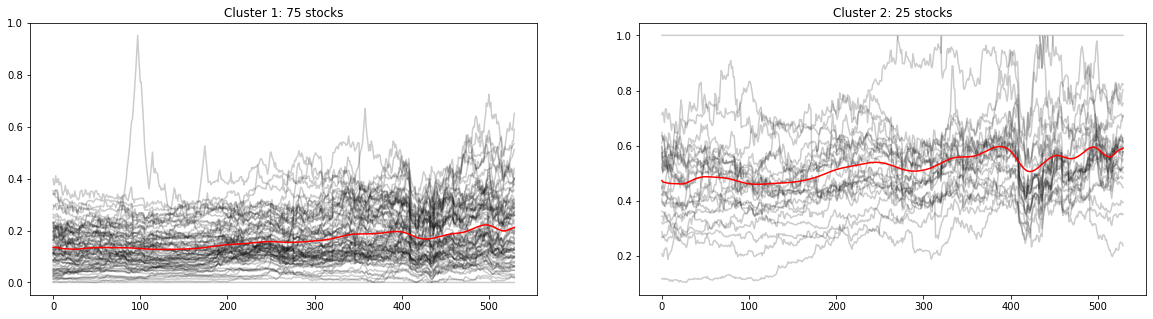

In [ ]:
# Soft-DTW k-means
print('\033[1m'+'Soft-DTW k-means')

y_pred_soft = soft_dtw_model[1].predict(data)

cluster_index = []

plt.figure(figsize=(20, 5))
for i in range(2):
  plt.subplot(1, 2, i + 1)
  cluster_index.append(np.where(y_pred_soft == i))
  count = 0
  for x in data[y_pred_soft == i]:
    count +=1
    plt.plot(x.ravel(), 'k-', alpha = 0.2)
  plt.plot(soft_dtw_model[1].cluster_centers_[i].ravel(), 'r-')
  plt.title('Cluster %d: %d stocks' % ((i + 1), count))
  
plt.show()

In [ ]:
#Danh sách các stock theo nhóm phân cụm
cluster_soft_dtw = []
for arr in cluster_index:
  for i in arr:
    tmp = []
    for j in i:
      tmp.append(symbol[int(j)])
  cluster_soft_dtw.append(tmp)

for i, el in zip(range(2), cluster_soft_dtw):
  print(i+1, el)

1 ['AAA', 'AAM', 'ABT', 'ACC', 'ACL', 'ADS', 'AGM', 'AGR', 'AMD', 'ANV', 'APC', 'APG', 'ASM', 'ASP', 'BCE', 'BCG', 'BFC', 'BIC', 'BMC', 'BMI', 'BRC', 'BSI', 'BTP', 'BWE', 'C32', 'C47', 'CCI', 'CCL', 'CDC', 'CEE', 'CHP', 'CIG', 'CII', 'CKG', 'CLC', 'CLL', 'CLW', 'CMV', 'CMX', 'CNG', 'CRC', 'CRE', 'CSM', 'CSV', 'CTF', 'CTG', 'CTI', 'CTS', 'CVT', 'DAG', 'DAH', 'DAT', 'DCL', 'DCM', 'DHM', 'DLG', 'DPM', 'DQC', 'DRC', 'DRH', 'DTA', 'DTL', 'DTT', 'DXG', 'DXV', 'EIB', 'ELC', 'EMC', 'EVE', 'FCM', 'FCN', 'FDC', 'FIR', 'FIT', 'FLC']
2 ['AGG', 'AST', 'BBC', 'BHN', 'BID', 'BMP', 'BTT', 'BVH', 'CAV', 'CMG', 'COM', 'CTD', 'D2D', 'DBC', 'DBD', 'DHA', 'DHC', 'DHG', 'DIG', 'DMC', 'DPG', 'DPR', 'DRL', 'DSN', 'DVP']
